# CHAPTER 16 - Making simple decisions  

### George Tzanetakis, University of Victoria 


## WORKPLAN 

The section number is based on the 4th edition of the AIMA textbook and is the suggested
reading for this week. Each list entry provides just the additional sections. For example the Expected reading include the sections listed under Basic as well as the sections listed under Expected. Some additional readings are suggested for Advanced. 

1. Basic: Sections **16.1**, **16.2**, **16.3**, and **Summary**
2. Expected: Same as Basic plus 16.4  
3. Advanced: All the chapter including bibligraphical and historical notes 




## Combining Beliefs and Desires under Uncertainty  

Utility theory combines with probability theory to create a decision-theoretic agent. Such an agent can mnake decisions in contexts in which uncertainty and conflicting goals would leave a logical agent with no clear way to make decisions. 
In contrast to a goal-based agent that has a binary distinction between goal states and non-goal states, a decision-theoretic agent assigns a continues range of values to states, and that way can make decisions even when no "best" state is available. 

An agent has to make decisions and has some available actions $\alpha$. There may be uncertainty about the current state, so we will assume that the agents assigns a probability $P(s)$ to each possible current state $s$. There maybe also be uncertainty about the action outcomes which can be modeled using a transition model $P(s'|s,a)$, the probability that action $\alpha$ in state $s$ reaches state $s'$. As there are potentially many states $s$ from which the action $\alpha$ results in $s'$ we define:

$$
P(RESULT(a) = s')= \sum_{s} P(s) P(s'|s,a)
$$

Decision theory, in its simplest form, deals with choosing among actions based on the desirability of their **immediate** outcomes (we assume the environment is episodic). The agents preferences are captured by a **utility function**, $U(s)$ which assigns a single number to express the desirability of a state. 

The principle of **maximum expected utility (MEU)** says that a rational agent should choose the action that maximizes the agent's expected utility: 
$$
action = \arg\max_{\alpha} EU(\alpha)
$$

Estimating the $P(s)$ over possible states of the world requires perception, learning, knowledge representation, and inference so there is a lot that goes into it but in principle we have a mathematical framework that is general enough to define the central AI problem. The success of an intelligent agent is in having a utility function that correctly reflects the performance measure. To some extent one could say the utility function is the agent's version of the performance metric which is something that is typically measured externally of the agent and is applied to a full history of actions. For example in chess a utility function could encode the "desirability" of certain states (for example configurations where you have a queen and your opponent does not have one) whereas the performance measure is how many games you win on average. 


## Constraints on rational preference

The book describes how one can specify various constraints on preferences that a rational agent should have. These consists of  observability, transivity, continuity, and substitutability, monotonicity, and dcomposability (sometimes refered to as the axioms of utility theory). One can show that MEU principle can be derived from these constraints but we will not cover that (if you are interested check the Textbook for the derivation). 

The important thing to take away from this is that we can think of the set of outcomes for each action as a **lottery** where each action is a ticket. A lottery $L$ with possible outcomes $S_1, \dots, S_n$ that occur with probabilities $p1,....,p_n$ is written 
$$
L = [p_1: S_1, p_2: S_2; \dots p_n, S_n]
$$
If each outcome is an atomic state this is basic a standard random variable. In general, each output $S_i$ of a lottery can be an atomic state or can be another **lottery** (note this is a recursive definition). 







### Markov Chains and Hidden Markov Models Example 

We start with random variables and a simple independent, identically distributed model for weather. Then we look into how to form a Markov Chain to transition between states and finally we sample a Hidden Markov Model to show how the samples are generated based on the Markov Chain of the hidden states. The results are visualized as strips of colored rectangles. Experiments with the transition probabilities and the emission probabilities can lead to better understanding of how Hidden Markov Models work in terms of generating data.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# from hmmlearn import hmm



class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution        
        if all(issubclass(type(item), np.integer) for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 
        
    def probs(self): 
        return self.probability_distribution
    
    def vals(self): 
        print(self.type)
        return self.values 
            
        

### Generating random weather samples with a IID model with no time dependencies


Let's first create some random samples of a symbolic random variable corresponding to the weather with two values Sunny (S) and cloudy (C) and generate random weather for 365 days. The assumption in this model is that the weather of each day is indepedent of the previous days and drawn from the same probability distribution.

In [2]:
values = ['S', 'C']
probabilities = [0.2, 0.8]
weather = Random_Variable('weather', values, probabilities)
samples = weather.sample(365)
print(",".join(samples))

C,C,C,C,C,S,C,C,C,C,C,C,C,C,C,C,C,S,C,C,S,C,C,C,C,C,S,S,C,C,S,S,C,C,C,C,C,C,C,C,C,S,C,C,C,S,C,C,C,C,C,S,S,C,S,C,C,C,C,S,C,C,C,S,S,C,C,C,C,C,C,C,C,C,C,C,C,C,C,S,C,C,C,C,C,S,S,C,C,C,C,C,C,C,C,C,C,C,C,C,S,C,C,S,C,S,C,C,C,C,C,C,C,C,C,C,S,C,C,C,C,C,C,S,C,S,S,C,C,C,S,S,S,C,S,S,S,C,S,C,S,C,S,C,C,C,C,C,C,S,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,S,C,C,C,C,S,C,S,C,S,C,S,C,C,S,C,C,C,C,C,C,S,C,C,C,C,C,C,S,C,S,C,C,C,C,C,C,C,S,C,C,C,C,C,S,C,C,C,S,C,C,C,C,S,C,C,C,C,C,S,C,C,C,C,C,C,S,S,C,S,C,C,C,S,C,C,S,C,C,C,C,C,C,S,C,C,C,C,C,C,C,C,S,C,S,C,S,C,C,S,S,S,C,C,C,C,C,S,C,C,C,C,C,C,C,C,C,C,C,S,C,C,S,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,C,S,C,C,C,S,C,C,C,C,C,S,C,C,C,C,C,C,C,C,C,S,S,C,C,C,C,C,S,C,C,C,C,C,C,C,C,S,C,C,S,C,S,S,S,C,C,C,S,C,S,C,S,C,C,C,C,C,C,C


Now let lets visualize these samples using yellow for sunny and grey for cloudy 

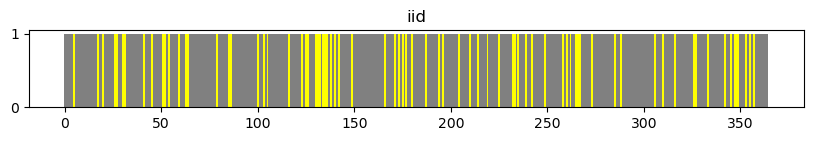

In [3]:
state2color = {} 
state2color['S'] = 'yellow'
state2color['C'] = 'grey'

def plot_weather_samples(samples, state2color, title): 
    colors = [state2color[x] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)
    plt.title(title)
    
plot_weather_samples(samples, state2color, 'iid')


### Markov Chain

Now instead of independently sampling the weather random variable lets form a markov chain. The Markov chain will start at a particular state and then will either stay in the same state or transition to a different state based on a transition probability matrix. To accomplish that we basically create a random variable for each row of the transition matrix that basically corresponds to the probabilities of the transitions emanating fromt the state corresponding to that row. Then we can use the markov chain to generate sequences of samples and contrast these sequence with the iid weather model. By adjusting the transition probabilities you can in a probabilistic way control the different lengths of "stretches" of the same state.


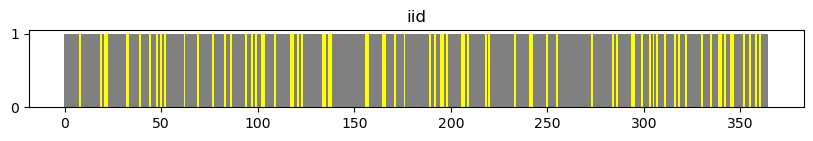

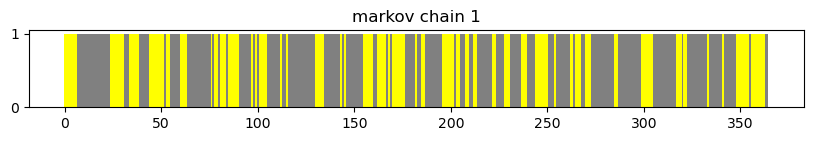

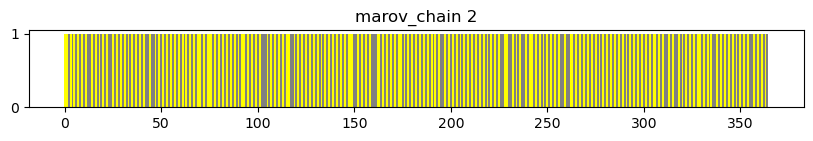

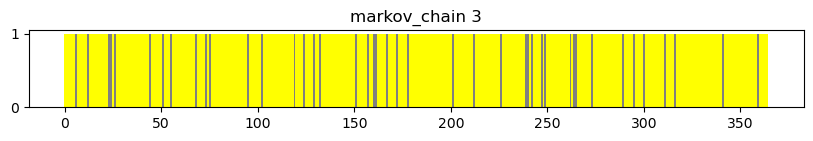

In [4]:
def markov_chain(transmat, state, state_names, samples): 
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0,rows))
    
    # create random variables for each row of transition matrix 
    for r in range(rows): 
        rv = Random_Variable("row" + str(r), values, transmat[r])
        rvs.append(rv)
    
    # start from initial state and then sample the appropriate 
    # random variable based on the state following the transitions 
    states = [] 
    for n in range(samples): 
        state = rvs[state].sample(1)[0]    
        states.append(state_names[state])
    return states


# transition matrices for the Markov Chain 
transmat1 = np.array([[0.7, 0.3], 
                    [0.2, 0.8]])

transmat2 = np.array([[0.1, 0.9], 
                    [0.9, 0.1]])

transmat3 = np.array([[0.9, 0.1], 
                     [0.9, 0.1]])

state2color = {} 
state2color['S'] = 'yellow'
state2color['C'] = 'grey'

# plot the iid model too
samples = weather.sample(365)
plot_weather_samples(samples, state2color, 'iid')

samples1 = markov_chain(transmat1,0,['S','C'], 365)
plot_weather_samples(samples1, state2color, 'markov chain 1')

samples2 = markov_chain(transmat2,0,['S','C'],365)
plot_weather_samples(samples2, state2color, 'marov_chain 2')

samples3 = markov_chain(transmat3,0,['S','C'], 365)
plot_weather_samples(samples3, state2color, 'markov_chain 3')



### Generating samples using a Hidden Markov Model 

Lets now look at how a Hidden Markov Model would work by having a Markov Chain to generate 
a sequence of states and for each state having a different emission probability. When sunny we will output red or yellow with higher probabilities and when cloudy black or blue. First we will write the code directly and then we will use the hmmlearn package. 


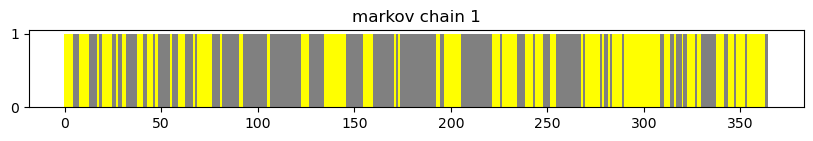

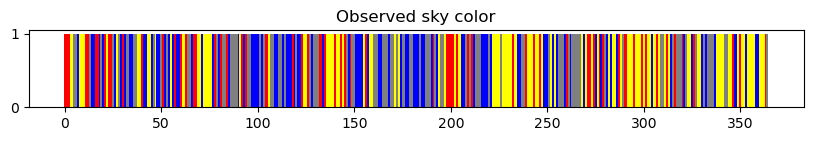

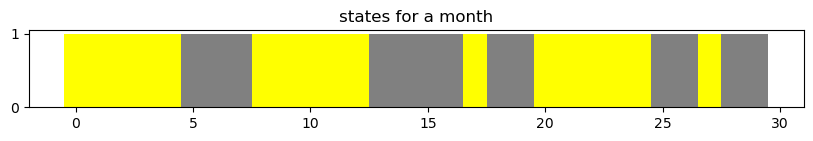

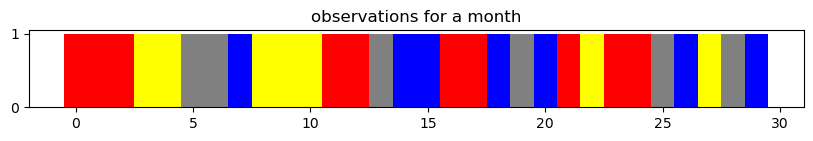

In [5]:
state2color = {} 
state2color['S'] = 'yellow'
state2color['C'] = 'grey'

# generate random samples for a year 
samples = weather.sample(365)
states = markov_chain(transmat1,0,['S','C'], 365)
plot_weather_samples(states, state2color, "markov chain 1")

# create two random variables one of the sunny state and one for the cloudy 
sunny_colors = Random_Variable('sunny_colors', ['y', 'r', 'b', 'g'], 
                              [0.6, 0.3, 0.1, 0.0])
cloudy_colors = Random_Variable('cloudy_colors', ['y', 'r', 'b', 'g'], 
                               [0.0, 0.1, 0.4, 0.5])

def emit_obs(state, sunny_colors, cloudy_colors): 
    if (state == 'S'): 
        obs = sunny_colors.sample(1)[0]
    else: 
        obs = cloudy_colors.sample(1)[0]
    return obs 

# iterate over the sequence of states and emit color based on the emission probabilities 
obs = [emit_obs(s, sunny_colors, cloudy_colors) for s in states]

obs2color = {} 
obs2color['y'] = 'yellow'
obs2color['r'] = 'red'
obs2color['b'] = 'blue'
obs2color['g'] = 'grey'
plot_weather_samples(obs, obs2color, "Observed sky color")

# let's zoom in a month 
plot_weather_samples(states[0:30], state2color, 'states for a month')
plot_weather_samples(obs[0:30], obs2color, 'observations for a month')


### Multinomial HMM 

Lets do the same generation process using the multinomail HMM model supported by the *hmmlearn* python package. 


In [6]:
from hmmlearn import hmm


transmat = np.array([[0.7, 0.3], 
                    [0.2, 0.8]])

start_prob = np.array([1.0, 0.0])

# yellow and red have high probs for sunny 
# blue and grey have high probs for cloudy 
emission_probs = np.array([[0.6, 0.3, 0.1, 0.0], 
                           [0.0, 0.1, 0.4, 0.5]])

model = hmm.CategoricalHMM(n_components=2)
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.emissionprob_ = emission_probs

# sample the model - X is the observed values 
# and Z is the "hidden" states 
X, Z = model.sample(365)



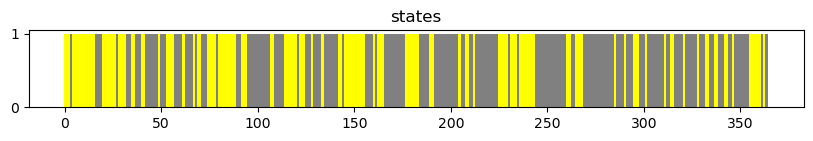

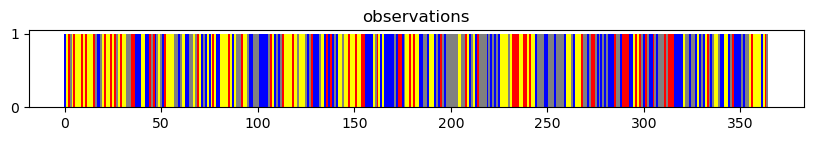

In [7]:
# we have to re-define state2color and obj2color as the hmm-learn 
# package just outputs numbers for the states 
state2color = {} 
state2color[0] = 'yellow'
state2color[1] = 'grey'
plot_weather_samples(Z, state2color, 'states')

samples = [item for sublist in X for item in sublist]
obj2color = {} 
obj2color[0] = 'yellow'
obj2color[1] = 'red'
obj2color[2] = 'blue'
obj2color[3] = 'grey'
plot_weather_samples(samples, obj2color, 'observations')

### Estimating the parameters of an HMM

Let's sample the generative HMM and get a sequence of 1000 observations. Now we can learn in an unsupervised way the paraemters of a two component multinomial HMM just using these observations. Then we can compare the learned parameters with the original parameters of the model used to generate the observations. Notice that the order of the components is different between the original and estimated models. Notice that hmmlearn does NOT directly support supervised training where you have both the labels and observations. It is possible to initialize a HMM model with some of the parameters and learn the others. For example you can initialize the transition matrix and learn the emission probabilities. That way you could implement supervised learning for a multinomial HMM. In many practical applications the hidden labels are not available and that's the hard case that is actually implemented in hmmlearn.

The following two cells take a few minutes to compute on a typical laptop.

In [8]:
# generate the samples 
X, Z = model.sample(10000)
# learn a new model 
estimated_model = hmm.CategoricalHMM(n_components=2, n_iter=10000).fit(X)


Let's compare the estimated model parameters with the original model. 


In [9]:
print("Transition matrix")
print("Estimated model:")
print(estimated_model.transmat_)
print("Original model:")
print(model.transmat_)
print("Emission probabilities")
print("Estimated model")
print(estimated_model.emissionprob_)
print("Original model")
print(model.emissionprob_)

Transition matrix
Estimated model:
[[0.69219345 0.30780655]
 [0.19666203 0.80333797]]
Original model:
[[0.7 0.3]
 [0.2 0.8]]
Emission probabilities
Estimated model
[[0.61167825 0.30519408 0.08214807 0.0009796 ]
 [0.00696061 0.0963516  0.38993772 0.50675008]]
Original model
[[0.6 0.3 0.1 0. ]
 [0.  0.1 0.4 0.5]]


### Predicting a sequence of states given a sequence of observations

We can also use the trained HMM model to predict a sequence of hidden states given a sequence of observations. This is the task of maximum likelihood sequence estimation. For example in Speech Recognition it would correspond to estimating a sequence of phonemes (hidden states) from a sequence of observations (acoustic vectors). 

This cell also takes a few minutes to compute. Note that whether the predicted or flipped predicted states correspond to the original depends on which state is selected as state0 and state1. So sometimes when you run the notebook the predicted states will be the right color some times the flipped states will be the right ones. 

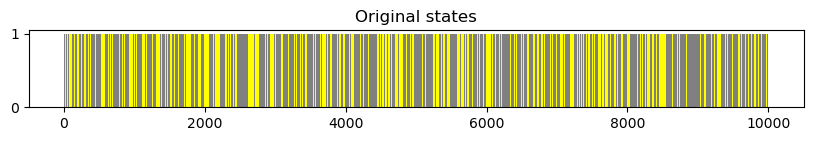

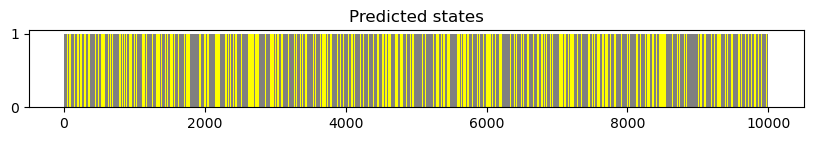

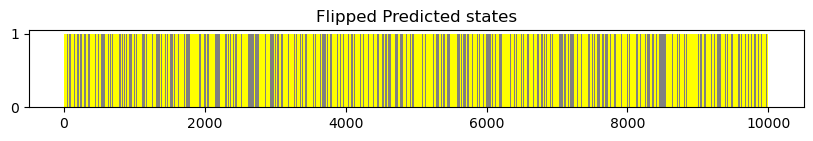

In [10]:
Z2 = estimated_model.predict(X)
state2color = {} 
state2color[0] = 'yellow'
state2color[1] = 'grey'
plot_weather_samples(Z, state2color, 'Original states')
plot_weather_samples(Z2, state2color, 'Predicted states')

# note the reversal of colors for the states as the order of components is not the same. 
# we can easily fix this by change the state2color 
state2color = {} 
state2color[1] = 'yellow'
state2color[0] = 'grey'
plot_weather_samples(Z2, state2color, 'Flipped Predicted states')



The estimated model can be sampled just like the original model 

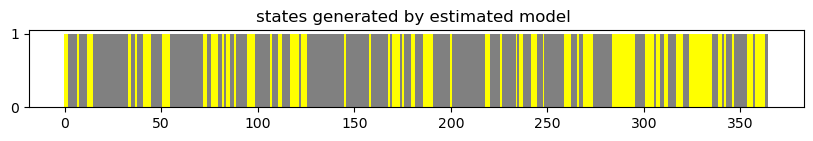

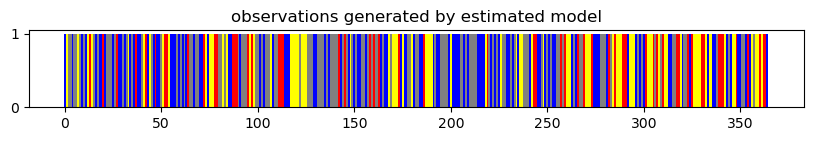

In [11]:
X, Z = estimated_model.sample(365)

state2color = {} 
state2color[0] = 'yellow'
state2color[1] = 'grey'
plot_weather_samples(Z, state2color, 'states generated by estimated model ')

samples = [item for sublist in X for item in sublist]
obs2color = {} 
obs2color[0] = 'yellow'
obs2color[1] = 'red'
obs2color[2] = 'blue'
obs2color[3] = 'grey'
plot_weather_samples(samples, obs2color, 'observations generated by estimated model')



### An example of filtering 

<img src="images/rain_umbrella_hmm.png" width="75%"/>


* Day 0: no observations $P(R_0) = <0.5, 0.5>$
* Day 1: let's say umbrella appears, $U_{1} = true$. 
    * The prediction step from $t=0$ to $t=1$ is 
    $P(R_1) = \sum_{r_0} P(R_1 | r_0) P(r_0) = \langle 0.7, 0.3 \rangle \times 0.5 + \langle 0.3, 0.7 \rangle \times 0.5 = \langle 0.5, 0.5\rangle $ 
    * The update step simply multiplies the probability of the evidence for $t=1$ and normalizes: 
    $P(R_1|u1) = \alpha P(u_{1} | R_{1}) P(R_1) = \alpha \langle 0.9, 0.2 \rangle \times \langle 0.5, 0.5 \rangle = \alpha \langle 0.45, 0.1 \rangle \approx \langle 0.818, 0.182 \rangle $
* Day 2: let's say umbrella appears, $U_{2} = true$. 
    *  Prediction step from $t=1$ to $t=2$ is $P(R_2 | u1) = \alpha P(u_1 | R_2) P(u_1) = \langle 0.7, 0.3 \rangle \times 0.818 + \langle 0.3 0.7 \rangle \times 0.182 \approx \langle 0.627, 0.373 \rangle $
    * Updating with evidence for t=2 gives: $P(R_2 | u_1, u_2) = \alpha P(u_2/R_2)P(R2|u_1)= \alpha \langle 0.9, 0.2 \rangle \times \langle 0.627, 0.373 \rangle = \alpha \langle 0.565, 0.0075 \rangle \approx \langle 0.883, 0.117 \rangle $
    
Intuitively, the probability of rain increases from day 1 to day 2 because the rain persists. 


Unrolling a Hidden Markov Model to a Bayesian Network

<img src="images/hmm_unrolling.png" width="75%"/>
